# Animate samples from a Gaussian distribution

This notebook demonstrates how to use the functionality in `ProbNum-Evaluation` to animate samples from a Gaussian distribution.

In [1]:
from probnumeval import visual
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../probnum-evaluation.mplstyle")
np.random.seed(42)

As a toy example, let us consider animate a sample from a Gaussian process on 15 grid points with `N =5` frames. 
The number of grid points determines the dimension of the underlying Normal distribution, therefore this variable is called `dim` in `ProbNum-Evaluation`.

In [2]:
dim = 15
num_frames = 5

For didactic reasons, let us set `endpoint` to `True`, which means that the final sample is the first sample.

In [3]:
states_gp = visual.animate_with_periodic_gp(dim, num_frames, endpoint=True)
states_sphere = visual.animate_with_great_circle_of_unitsphere(dim, num_frames, endpoint=True)

The output of the `animate_with*` function is a sequence of (pseudo-) samples from a standard Normal distribution.

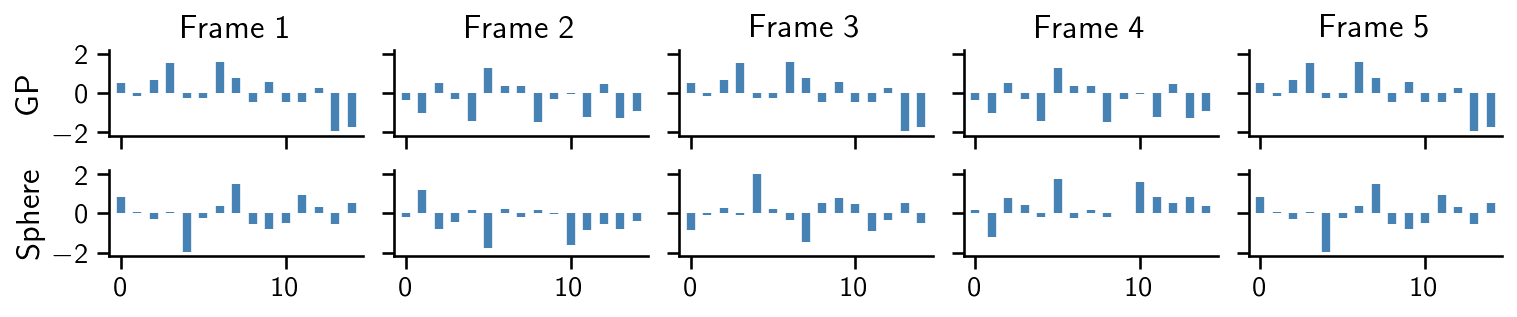

In [7]:
fig, axes = plt.subplots(ncols=num_frames, nrows=2, sharey=True, sharex=True, figsize=(num_frames*2, 2), constrained_layout=True)

for ax in axes.flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
for state_sphere, state_gp, ax in zip(states_sphere, states_gp, axes.T):
    ax[0].vlines(np.arange(dim), ymin=np.minimum(0., state_gp), ymax=np.maximum(0., state_gp), linewidth=4)
    ax[1].vlines(np.arange(dim), ymin=np.minimum(0., state_sphere), ymax=np.maximum(0., state_sphere), linewidth=4)

axes[0][0].set_ylabel('GP')
axes[1][0].set_ylabel('Sphere')
for idx, ax in enumerate(axes.T):
    ax[0].set_title(f"Frame {idx+1}", fontsize="medium")
fig.align_ylabels()
plt.show()

These can be turned into samples from a multivariate Normal distribution $N(m, K)$ via the formula $u \mapsto m + \sqrt{K} u$

In [5]:
def k(s, t):
    return np.exp(-(s - t)**2/0.1)

locations = np.linspace(0, 1, dim)
cov = k(locations[:, None], locations[None, :])
cov_cholesky = np.linalg.cholesky(cov + 1e-12 * np.eye(dim))

# From the "right", because the states have shape (N, d).
samples_sphere = states_sphere @ cov_cholesky.T
samples_gp = states_gp @ cov_cholesky.T


The resulting (pseudo-)samples "move through the sample space" in a continuous way for both, the periodic GP and the sphere. 

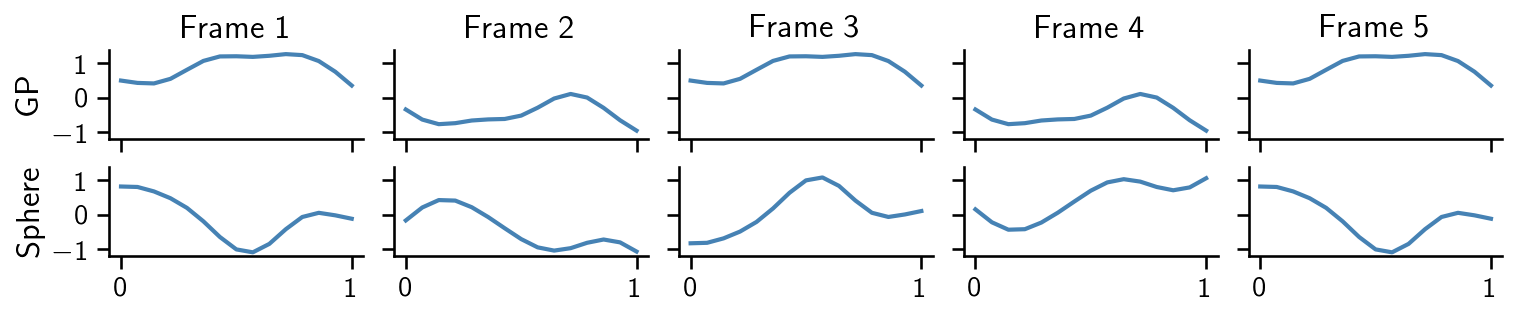

In [8]:
fig, axes = plt.subplots(dpi=150, ncols=num_frames, nrows=2, sharey=True, sharex=True, figsize=(num_frames*2, 2), constrained_layout=True)

for ax in axes.flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
for sample_sphere, sample_gp, ax in zip(samples_sphere, samples_gp, axes.T):
    ax[0].plot(locations, sample_gp)
    ax[1].plot(locations, sample_sphere)

axes[0][0].set_ylabel('GP')
axes[1][0].set_ylabel('Sphere')
for idx, ax in enumerate(axes.T):
    ax[0].set_title(f"Frame {idx+1}", fontsize="medium")
fig.align_ylabels()
plt.show()

The difference between the spherical version and the GP version is that path that each sample takes: for the spherical sample, the paths are a lot more symmetric than for the GP sample.